In [3]:
import pandas as pb 
import numpy as np
from matplotlib.pyplot import plot_date
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data = pb.read_excel("/Users/jonathanmata/Documents/Ai_Project/Combined Data with averages.xlsx")

x= data.loc[:,('HW Average','PJ01 ','EX 01','Quiz Average')]

x['HW Average']=x['HW Average']*5

grade = data['Grade']

finalGrade = data['Final']

X_train, X_test,Y_train,Y_test = train_test_split(x,grade,random_state=42,test_size=.30)



Found out that the Category NB comes out as the best accracy without optimizating each model that excist for NB 

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import CategoricalNB

# Assuming X_train and y_train are your training features and labels
# Define the parameters grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize CategoricalNB classifier
clf = CategoricalNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=6, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train.iloc[:,3:].to_numpy(dtype='float64'),Y_train)
# 
# Get the best parameters and the best score
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_score)
print(best_model)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(best_alpha)

CategoricalNB(alpha=0.5)
{'alpha': 0.5}
0.45697167755991286
0.5


To validate that the alpha is really the best for categorical Navie Bayas 

In [6]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(CategoricalNB(alpha=best_alpha), X_train, Y_train, cv=6)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

print(best_alpha)
# Calculate the mean cross-validation score
mean_cv_score = cv_scores[2:].mean()
print("Mean cross-validation score:", mean_cv_score)

Cross-validation scores: [       nan 0.5        0.72222222 0.41176471 0.70588235 0.94117647]
0.5
Mean cross-validation score: 0.6952614379084967


/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 102, in predict
    jll = self._joint_log_likelihood(X)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-pa

This is the final ai model for naive bayes and probibly the best accracy scoring model 


In [7]:
cCNB = CategoricalNB(alpha=0.5)
cCNB.fit(X_train,Y_train)
preCa = cCNB.predict(X_test)

how_good = accuracy_score(Y_test,preCa)
print(how_good)

0.6444444444444445


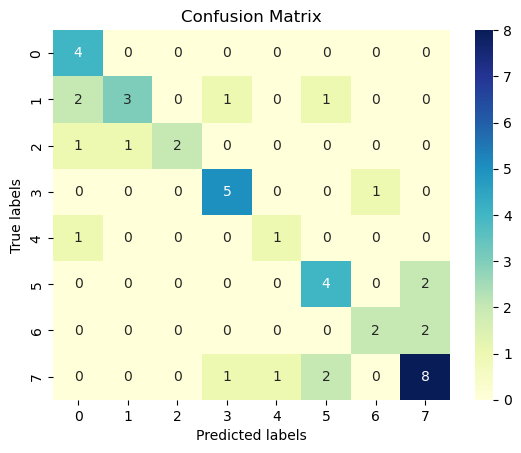

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your CategoricalNB model and obtained predictions
conf_matrix = confusion_matrix(Y_test, preCa)
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 102, in predict
    jll = self._joint_log_likelihood(X)
  File "/Users/jonathanmata/anaconda3/lib/python3.10/site-

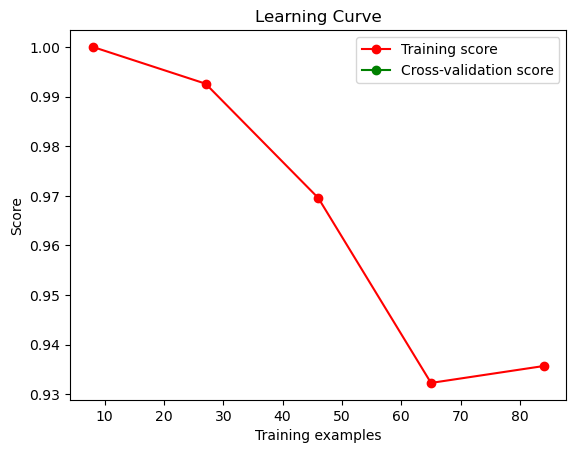

In [9]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(CategoricalNB(), X_train, Y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

['average' 'ex' 'hw' 'pj01' 'quiz']
CountVectorizer()
[array([[-5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.03043792,
        -5.03043792, -5.03043792, -5.03043792, -5.03043792, -5.030437

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (8, 101).

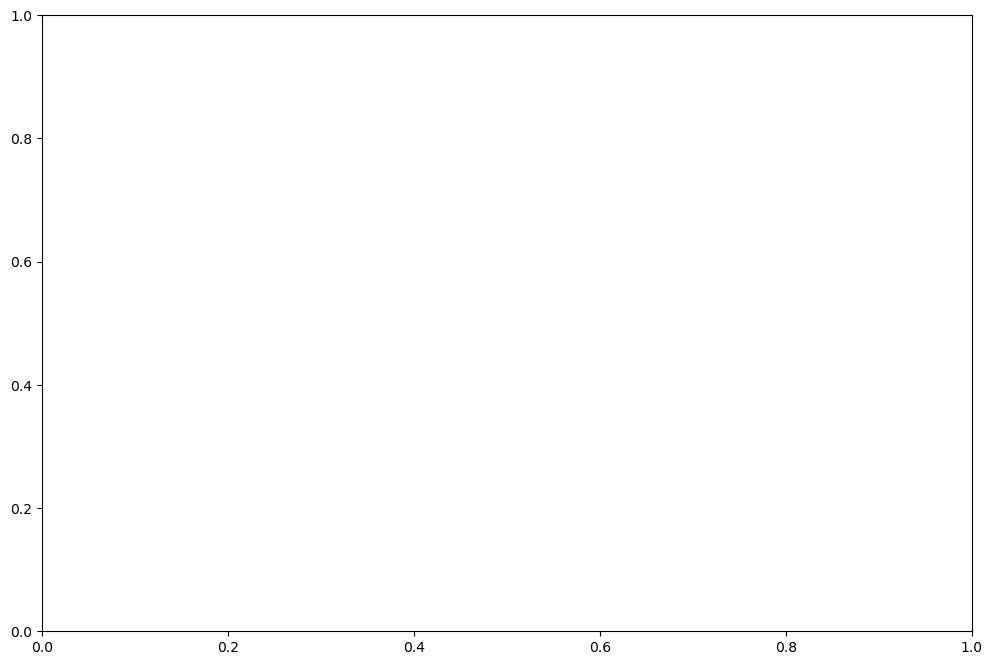

In [18]:
# Get feature names
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()
feature_names = feature_names[1:feature_names.size]
print(feature_names)

print(vectorizer)
# Get feature log probabilities for each class
feature_importance = cCNB.feature_log_prob_
print(feature_importance)
# Plot feature importances for each class
plt.figure(figsize=(12, 8))
num_classes = len(feature_importance)
num_features = len(feature_names)
for i in range(num_classes):
    plt.bar(range(num_features), np.exp(feature_importance[i]), alpha=0.7, label=f'Class {i}')

plt.xlabel('Feature')
plt.ylabel('Importance (Probability)')
plt.title('Feature Importance by Class')
plt.xticks(rotation=45)
plt.legend()
plt.show()
